fequence :  0.0


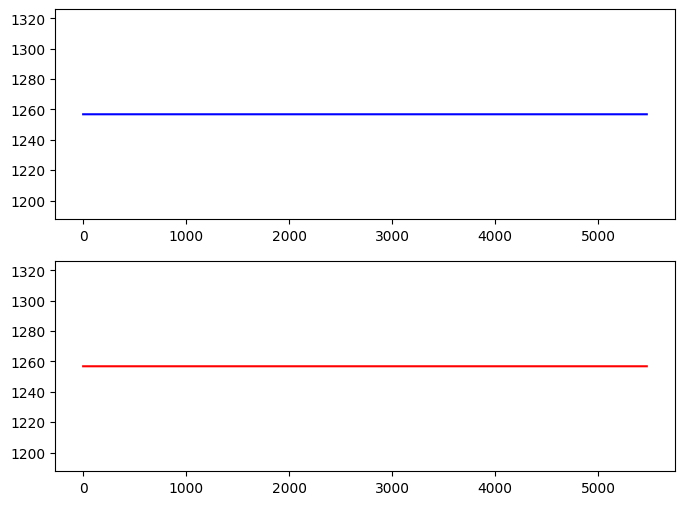

fequence :  0.011857707509881422
Period :  84.33333333333334 (Days)


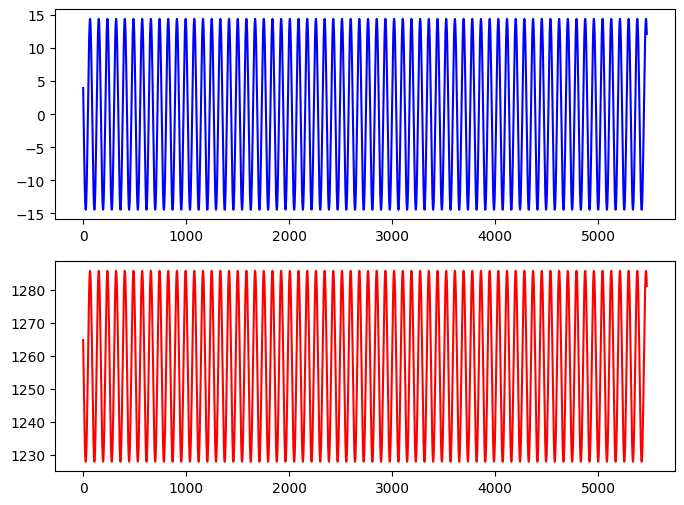

fequence :  0.007905138339920948
Period :  126.50000000000001 (Days)


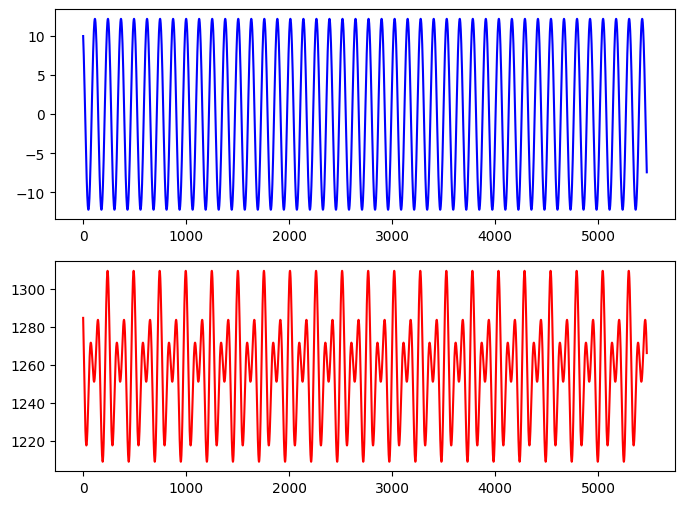

fequence :  0.003952569169960474
Period :  253.00000000000003 (Days)


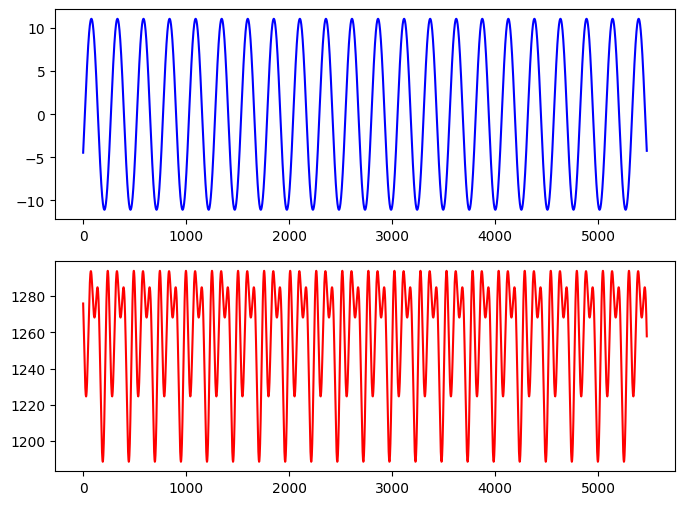

fequence :  0.01976284584980237
Period :  50.60000000000001 (Days)


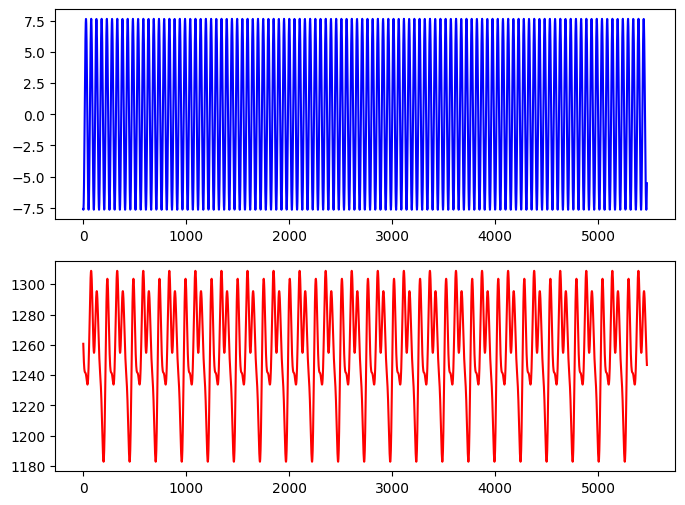

fequence :  0.023715415019762844
Period :  42.16666666666667 (Days)


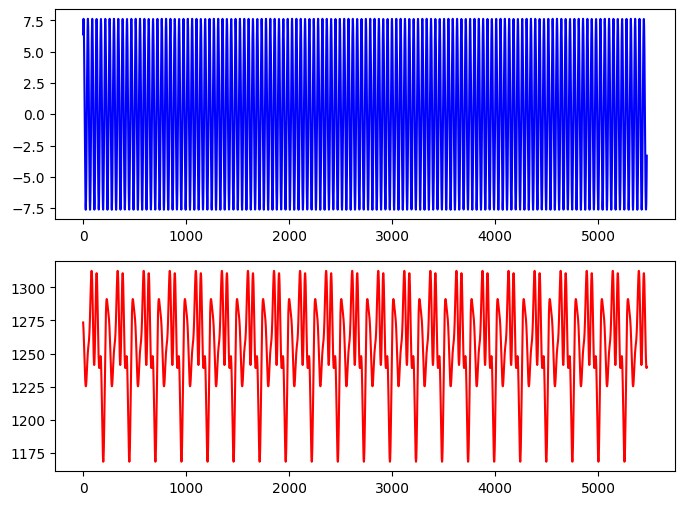

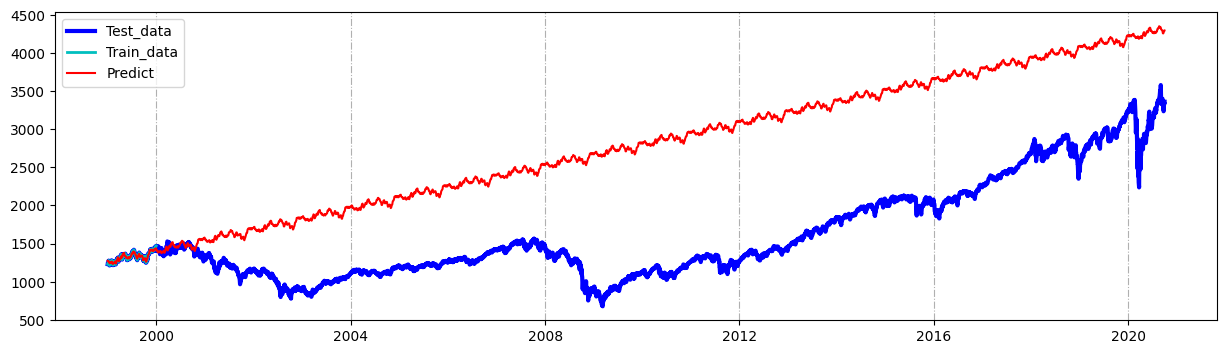

In [5]:
from signal import signal
import numpy as np
import pylab as pl
from numpy import fft
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

def fourierExtrapolation(x, n_predict, n_harm):
    # fft process
    n = x.size
    n_harm = n_harm                 # number of harmonics in model
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
    f = fft.fftfreq(n) 

    # set index
    indexes = list(range(n))                               # frequencies
    # indexes.sort(key = lambda i: np.absolute(f[i]))      # sort indexes by frequency, lower -> higher
    indexes.sort(key=lambda i: np.absolute(x_freqdom[i]))  # sort indexes by amplitudes, lower -> higher 
    indexes.reverse()                                      # sort indexes by amplitudes, higher -> lower 

    # restore signal
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    count = 0
    for i in indexes[:1 + n_harm * 2]:                         # 因frequence有負對稱,故*2
        ampli = np.absolute(x_freqdom[i]) / n                  # amplitude
        phase = np.angle(x_freqdom[i])                         # phase
        signal = ampli * np.cos(2 * np.pi * f[i] * t + phase)  # restore signal
        restored_sig += signal

        # draw signals
        if( count <= 10 and count % 2 ==0 ) :
            print('fequence : ' ,abs(f[i]))
            if (abs(f[i]) != 0):
                print('Period : ' ,1/abs(f[i]) ,'(Days)')
            fig, axes = plt.subplots(2, 1, figsize=(8, 6))
            axes[0].plot(signal, 'b',label = 'sig')
            axes[1].plot(restored_sig, 'r',label = 'restored_sig')
            plt.show()
        count += 1

    return restored_sig + p[0] * t

def main():
    # set train data period
    date_0 = '1999-01-01'
    date_1 = '2000-01-01'
    data = yf.Ticker("^GSPC").history(start=date_0, end=date_1)
    price = data['Close']
    x = np.array(price)

    # set test data period
    date_2 = '2020-10-01'
    data2 = yf.Ticker("^GSPC").history(start=date_0, end=date_2)
    price2 = data2['Close']
    x2 = np.array(price2)
 
    # set predict options
    n_predict = price2.size - price.size
    n_harm = 10 # number of haromnics in model
    extrapolation = fourierExtrapolation(x, n_predict, n_harm)

    # draw plot
    pl.plt.figure(figsize=(15,4))
    pl.plot(price2.index, x2, 'b', linewidth = 3,label = 'Test_data')
    pl.plot(price.index, x, 'c', linewidth = 2, label = 'Train_data')
    pl.plot(price2.index, extrapolation, 'r',label = 'Predict')
    pl.plt.grid(axis='x',linestyle='-.')
    pl.legend()
    pl.show()
    
if __name__ == "__main__":
    main()